In [1]:
# imports 
import pandas as pd
import pickle5 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from  phynteny_utils import statistics

# Note that the actual figures may give even better annotation 

In [28]:
#import the output from the testing procedure
AUC = pickle5.load(open('per_model_testAUC.pkl', 'rb'))
ROC = pd.read_csv('per_model_testROC.pkl', sep = '\t', index_col = 'Unnamed: 0')
report = pickle5.load(open('per_model_testreport.tsv', 'rb'))
threshold = pd.read_csv('per_model_testthreshold_metrics', sep = '\t', index_col = 0)



(0.0, 1.01)

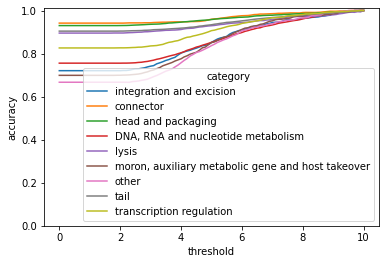

In [30]:
ax = sns.lineplot(data = threshold, x = 'threshold', y = 'accuracy', hue = 'category')
plt.ylim(0, 1.01)

#apply pareto opimization to select the optimal Phynteny score 

### make initial plot to evaluate how accurately the model performs 

<Axes: xlabel='support', ylabel='precision'>

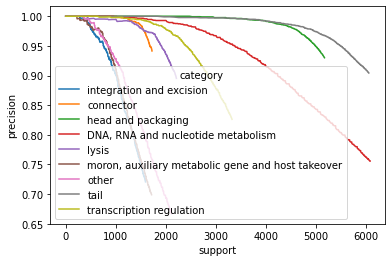

In [22]:
thresh = pd.read_csv('include_supportthreshold_metrics.tsv', sep = '\t', index_col = 0)
sns.lineplot(data=thresh, x = 'support', y = 'precision', hue = 'category')

In [38]:
#rather than overal support should be 'fraction annotated' categories with more sequeces are otherwise inflated 
categories = list(set(thresh['category']))
thresh_norm = 0
counter = 0 

for c in categories: 
    df = thresh[thresh['category'] == c ]
    df['fraction annotated'] = df['support'].to_list()/thresh[thresh['category'] == c ]['support'].max()
    
    if counter == 0: 
        thresh_norm = df
        
    else: 
        thresh_norm = pd.concat([thresh_norm, df])
        
    counter += 1 

<ipython-input-38-4dc73345f70a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraction annotated'] = df['support'].to_list()/thresh[thresh['category'] == c ]['support'].max()


In [ ]:
thresh = pd.read_csv('include_supportthreshold_metrics.tsv', sep = '\t', index_col = 0)
g = sns.lineplot(data=thresh_norm, x = 'fraction annotated', y = 'precision', hue = 'category')
g.set(ylim=(0,1.05))

[(0.0, 1.05)]

In [28]:
thresh[thresh['category'] == c ]['support'].max()

1717.0

In [ ]:
#make this plot comparing the precision and the support 

In [10]:
set(thresh['category']) #why are there strange drop offs which occur 
#this unusual effect is due to the recall

{'DNA, RNA and nucleotide metabolism',
 'connector',
 'head and packaging',
 'integration and excision',
 'lysis',
 'moron, auxiliary metabolic gene and host takeover',
 'other',
 'tail',
 'transcription regulation'}

In [17]:
thresh[thresh['category'] == 'lysis'].sort_values('support', ascending=False)['f1-score'].to_list()

[0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,
 0.944682880305198,


In [114]:
# to make plot comparing the thresholds need different code 
# will want ot compare across a lot more than 10 values to implement the pareto opimization 

{'1': {'precision': 0.7205513784461153,
  'recall': 0.6736965436438196,
  'f1-score': 0.696336663639116,
  'support': 1707},
 '2': {'precision': 0.9414492753623188,
  'recall': 0.9027237354085603,
  'f1-score': 0.9216799091940976,
  'support': 1799},
 '3': {'precision': 0.9299941984142333,
  'recall': 0.9188001528467711,
  'f1-score': 0.924363286881307,
  'support': 5234},
 '4': {'precision': 0.7554678506824536,
  'recall': 0.860621955788685,
  'f1-score': 0.8046238724932131,
  'support': 5338},
 '5': {'precision': 0.8951649344780841,
  'recall': 0.8971920289855072,
  'f1-score': 0.8961773354444695,
  'support': 2208},
 '6': {'precision': 0.6988934187536401,
  'recall': 0.6191950464396285,
  'f1-score': 0.6566347469220246,
  'support': 1938},
 '7': {'precision': 0.6668241965973535,
  'recall': 0.5963651732882502,
  'f1-score': 0.6296296296296297,
  'support': 2366},
 '8': {'precision': 0.9042430245996368,
  'recall': 0.9381637547105173,
  'f1-score': 0.9208911307271962,
  'support': 58

In [67]:
# test the models ability to test unknown functions 
model = tf.keras.models.load_model('../best_val_loss/row_model_tuning_200memory.rep_0.best_val_loss.h5')
x = pickle5.load(open('/home/grig0076/scratch/phynteny_data/phynteny_data_smalltest_X_row.pkl', 'rb'))
y = pickle5.load(open('/home/grig0076/scratch/phynteny_data/phynteny_data_smalltest_y_row.pkl', 'rb'))
x = list(x.values())
y = list(y.values())

In [68]:
np.round(model.predict(x[4].reshape(1, 120, 10))*10, decimals =2)

1/1 [==============================] - 1s 1s/step


array([[0.  , 0.1 , 0.01, 9.77, 0.08, 0.  , 0.  , 0.02, 0.01, 0.  ]],
      dtype=float32)

In [74]:
#test at predicting the function of unknowns 
masked_idx = [statistics.get_masked(x[i], 10) for i in range(len(x))]

In [70]:
for i in range(len(x)): 
    x[i][masked_idx[i]] = y[i]

In [108]:
i = 4
#get the indexes of the unknowns 
unk_idx = np.where(x[i][:,0] == 1)[0]

In [109]:
x[i][unk_idx[i]] = np.zeros(10)

In [110]:
model.predict(x[i].reshape(1, 120, 10))

1/1 [==============================] - 0s 57ms/step


array([[1.2315539e-12, 8.2122183e-01, 4.4805853e-05, 4.7965141e-04,
        2.7114926e-02, 2.0431992e-04, 1.0177605e-03, 8.3605275e-03,
        2.5824862e-04, 1.4129783e-01]], dtype=float32)

In [ ]:
#write code for computing the apreto opimisation 

can tell that the model is no longer predicting the unknown category as the highest ranked category (yay!) 

In [86]:
#need a new way of knowing where we switch from padding to actual unknowns 

In [ ]:
#teslineplote models on predicting the function of unknown genes as well 